In [1]:
import pandas as pd
import numpy as np
import time

df = pd.read_excel('Dados de 2021 - Coletados em 17-06-2024 - REV02.xlsx')
df

,Posição,Código do IBGE,Município,Estado,IN049_AE - Índice de perdas na distribuição,POP_TOT - População total do município,PIB - Produto Interno Bruto per capita,AG003 - Quantidade de economias ativas de água,AG005 - Extensão da rede de água,AG006 - Volume de água produzido,...,AG010 - Volume de água consumido,IN005_AE - Tarifa média de água,IN009_AE - Índice de hidrometração,IN020_AE - Extensão da rede de água por ligação,IN022_AE - Consumo médio per capita de água,Código do Município,Ano de Referência,Prestadores,Serviços,Natureza Jurídica
0,3963,2700300,Arapiraca,AL,55.56,234309,25248.44,61774,645.73,8669.05,...,8386.51,7.42,99.97,8.0,89.8,270030,2021,[27043000] Companhia de Saneamento de Alagoas ...,Água e Esgoto | Res. Sólidos,Sociedade de economia mista com administração ...
1,3286,2700607,Barra de São Miguel,AL,43.23,8434,28270.19,5491,73.08,1831.89,...,1509.74,7.03,96.25,12.8,218.4,270060,2021,[27043000] Companhia de Saneamento de Alagoas ...,Água e Esgoto | Água e Esgoto | Res. Sólidos,Sociedade de economia mista com administração ...
2,2708,2700706,Batalha,AL,37.25,18440,12469.24,2903,75.00,0.00,...,291.05,6.14,99.86,15.8,74.3,291992,2021,[29274000] Empresa Baiana de Águas e Saneament...,Água e Esgoto,Sociedade de economia mista com administração ...
3,232,2701209,Cacimbinhas,AL,17.39,10920,12862.72,827,36.10,0.00,...,81.55,6.70,99.87,25.5,75.5,320530,2021,[32053000] Companhia Espírito-Santense de Sane...,Água e Esgoto | Res. Sólidos,Sociedade de economia mista com administração ...
4,1505,2701308,Cajueiro,AL,27.20,21397,9714.88,5080,65.60,2145.50,...,1562.00,1.79,93.03,10.1,215.2,270130,2021,[27013011] Serviço Autônomo de Água e Esgoto -...,Água e Esgoto | Res. Sólidos,Autarquia | Administração pública direta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3991,1539,1720978,Talismã,TO,27.47,2831,51821.96,744,20.50,169.58,...,123.00,3.64,98.69,22.7,173.0,172097,2021,[17095000] Hidro Forte Administração e Operaçã...,Água e Esgoto | Res. Sólidos,Empresa privada | Administração pública direta
3992,3154,1721208,Tocantinópolis,TO,41.22,22820,16329.62,7453,129.72,1662.55,...,975.85,5.74,100.00,15.7,125.5,172120,2021,[17210000] Companhia de Saneamento do Tocantin...,Água e Esgoto | Res. Sólidos,Empresa privada | Administração pública direta
3993,3771,1721257,Tupirama,TO,51.30,1952,60880.42,547,5.86,152.57,...,74.30,5.89,100.00,10.4,109.0,172125,2021,[17210001] Agência Tocantinense de Saneamento ...,Água | Res. Sólidos,Autarquia | Administração pública direta
3994,2731,1722081,Wanderlândia,TO,37.43,11783,15566.87,2859,42.22,428.29,...,266.11,5.12,100.00,13.6,94.2,172208,2021,[17210000] Companhia de Saneamento do Tocantin...,Água | Res. Sólidos,Empresa privada | Administração pública direta


# Filtrando Data Frame

In [2]:
indices_colunas = list(range(16))

df_filtrado = df.iloc[:, indices_colunas]

df_filtrado

,Posição,Código do IBGE,Município,Estado,IN049_AE - Índice de perdas na distribuição,POP_TOT - População total do município,PIB - Produto Interno Bruto per capita,AG003 - Quantidade de economias ativas de água,AG005 - Extensão da rede de água,AG006 - Volume de água produzido,AG008 - Volume de água micromedido,AG010 - Volume de água consumido,IN005_AE - Tarifa média de água,IN009_AE - Índice de hidrometração,IN020_AE - Extensão da rede de água por ligação,IN022_AE - Consumo médio per capita de água
0,3963,2700300,Arapiraca,AL,55.56,234309,25248.44,61774,645.73,8669.05,7116.06,8386.51,7.42,99.97,8.0,89.8
1,3286,2700607,Barra de São Miguel,AL,43.23,8434,28270.19,5491,73.08,1831.89,518.67,1509.74,7.03,96.25,12.8,218.4
2,2708,2700706,Batalha,AL,37.25,18440,12469.24,2903,75.00,0.00,290.46,291.05,6.14,99.86,15.8,74.3
3,232,2701209,Cacimbinhas,AL,17.39,10920,12862.72,827,36.10,0.00,81.47,81.55,6.70,99.87,25.5,75.5
4,1505,2701308,Cajueiro,AL,27.20,21397,9714.88,5080,65.60,2145.50,1475.48,1562.00,1.79,93.03,10.1,215.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3991,1539,1720978,Talismã,TO,27.47,2831,51821.96,744,20.50,169.58,91.27,123.00,3.64,98.69,22.7,173.0
3992,3154,1721208,Tocantinópolis,TO,41.22,22820,16329.62,7453,129.72,1662.55,975.85,975.85,5.74,100.00,15.7,125.5
3993,3771,1721257,Tupirama,TO,51.30,1952,60880.42,547,5.86,152.57,56.39,74.30,5.89,100.00,10.4,109.0
3994,2731,1722081,Wanderlândia,TO,37.43,11783,15566.87,2859,42.22,428.29,266.11,266.11,5.12,100.00,13.6,94.2


In [3]:
df_filtrado.set_index(df_filtrado.columns[0], inplace=True)
df_filtrado

,Código do IBGE,Município,Estado,IN049_AE - Índice de perdas na distribuição,POP_TOT - População total do município,PIB - Produto Interno Bruto per capita,AG003 - Quantidade de economias ativas de água,AG005 - Extensão da rede de água,AG006 - Volume de água produzido,AG008 - Volume de água micromedido,AG010 - Volume de água consumido,IN005_AE - Tarifa média de água,IN009_AE - Índice de hidrometração,IN020_AE - Extensão da rede de água por ligação,IN022_AE - Consumo médio per capita de água
Posição,,,,,,,,,,,,,,,
3963,2700300,Arapiraca,AL,55.56,234309,25248.44,61774,645.73,8669.05,7116.06,8386.51,7.42,99.97,8.0,89.8
3286,2700607,Barra de São Miguel,AL,43.23,8434,28270.19,5491,73.08,1831.89,518.67,1509.74,7.03,96.25,12.8,218.4
2708,2700706,Batalha,AL,37.25,18440,12469.24,2903,75.00,0.00,290.46,291.05,6.14,99.86,15.8,74.3
232,2701209,Cacimbinhas,AL,17.39,10920,12862.72,827,36.10,0.00,81.47,81.55,6.70,99.87,25.5,75.5
1505,2701308,Cajueiro,AL,27.20,21397,9714.88,5080,65.60,2145.50,1475.48,1562.00,1.79,93.03,10.1,215.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1539,1720978,Talismã,TO,27.47,2831,51821.96,744,20.50,169.58,91.27,123.00,3.64,98.69,22.7,173.0
3154,1721208,Tocantinópolis,TO,41.22,22820,16329.62,7453,129.72,1662.55,975.85,975.85,5.74,100.00,15.7,125.5
3771,1721257,Tupirama,TO,51.30,1952,60880.42,547,5.86,152.57,56.39,74.30,5.89,100.00,10.4,109.0


In [4]:
df_filtrado = df_filtrado.drop(df_filtrado.columns[0], axis=1)
df_filtrado

,Município,Estado,IN049_AE - Índice de perdas na distribuição,POP_TOT - População total do município,PIB - Produto Interno Bruto per capita,AG003 - Quantidade de economias ativas de água,AG005 - Extensão da rede de água,AG006 - Volume de água produzido,AG008 - Volume de água micromedido,AG010 - Volume de água consumido,IN005_AE - Tarifa média de água,IN009_AE - Índice de hidrometração,IN020_AE - Extensão da rede de água por ligação,IN022_AE - Consumo médio per capita de água
Posição,,,,,,,,,,,,,,
3963,Arapiraca,AL,55.56,234309,25248.44,61774,645.73,8669.05,7116.06,8386.51,7.42,99.97,8.0,89.8
3286,Barra de São Miguel,AL,43.23,8434,28270.19,5491,73.08,1831.89,518.67,1509.74,7.03,96.25,12.8,218.4
2708,Batalha,AL,37.25,18440,12469.24,2903,75.00,0.00,290.46,291.05,6.14,99.86,15.8,74.3
232,Cacimbinhas,AL,17.39,10920,12862.72,827,36.10,0.00,81.47,81.55,6.70,99.87,25.5,75.5
1505,Cajueiro,AL,27.20,21397,9714.88,5080,65.60,2145.50,1475.48,1562.00,1.79,93.03,10.1,215.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1539,Talismã,TO,27.47,2831,51821.96,744,20.50,169.58,91.27,123.00,3.64,98.69,22.7,173.0
3154,Tocantinópolis,TO,41.22,22820,16329.62,7453,129.72,1662.55,975.85,975.85,5.74,100.00,15.7,125.5
3771,Tupirama,TO,51.30,1952,60880.42,547,5.86,152.57,56.39,74.30,5.89,100.00,10.4,109.0


In [5]:
col_perdas = df_filtrado.columns[2]   

new_column_order = [col_perdas] + [col for i, col in enumerate(df_filtrado.columns) if i != 2]

df_filtrado = df_filtrado[new_column_order]

df_filtrado

,IN049_AE - Índice de perdas na distribuição,Município,Estado,POP_TOT - População total do município,PIB - Produto Interno Bruto per capita,AG003 - Quantidade de economias ativas de água,AG005 - Extensão da rede de água,AG006 - Volume de água produzido,AG008 - Volume de água micromedido,AG010 - Volume de água consumido,IN005_AE - Tarifa média de água,IN009_AE - Índice de hidrometração,IN020_AE - Extensão da rede de água por ligação,IN022_AE - Consumo médio per capita de água
Posição,,,,,,,,,,,,,,
3963,55.56,Arapiraca,AL,234309,25248.44,61774,645.73,8669.05,7116.06,8386.51,7.42,99.97,8.0,89.8
3286,43.23,Barra de São Miguel,AL,8434,28270.19,5491,73.08,1831.89,518.67,1509.74,7.03,96.25,12.8,218.4
2708,37.25,Batalha,AL,18440,12469.24,2903,75.00,0.00,290.46,291.05,6.14,99.86,15.8,74.3
232,17.39,Cacimbinhas,AL,10920,12862.72,827,36.10,0.00,81.47,81.55,6.70,99.87,25.5,75.5
1505,27.20,Cajueiro,AL,21397,9714.88,5080,65.60,2145.50,1475.48,1562.00,1.79,93.03,10.1,215.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1539,27.47,Talismã,TO,2831,51821.96,744,20.50,169.58,91.27,123.00,3.64,98.69,22.7,173.0
3154,41.22,Tocantinópolis,TO,22820,16329.62,7453,129.72,1662.55,975.85,975.85,5.74,100.00,15.7,125.5
3771,51.30,Tupirama,TO,1952,60880.42,547,5.86,152.57,56.39,74.30,5.89,100.00,10.4,109.0


In [6]:
df_filtrado.isnull().sum()

IN049_AE - Índice de perdas na distribuição        0
Município                                          0
Estado                                             0
POP_TOT - População total do município             0
PIB - Produto Interno Bruto per capita             0
AG003 - Quantidade de economias ativas de água     0
AG005 - Extensão da rede de água                   0
AG006 - Volume de água produzido                   0
AG008 - Volume de água micromedido                 0
AG010 - Volume de água consumido                   0
IN005_AE - Tarifa média de água                    0
IN009_AE - Índice de hidrometração                 0
IN020_AE - Extensão da rede de água por ligação    0
IN022_AE - Consumo médio per capita de água        0
dtype: int64

In [7]:
df_filtrado.describe()

,IN049_AE - Índice de perdas na distribuição,POP_TOT - População total do município,PIB - Produto Interno Bruto per capita,AG003 - Quantidade de economias ativas de água,AG005 - Extensão da rede de água,AG006 - Volume de água produzido,AG008 - Volume de água micromedido,AG010 - Volume de água consumido,IN005_AE - Tarifa média de água,IN009_AE - Índice de hidrometração,IN020_AE - Extensão da rede de água por ligação,IN022_AE - Consumo médio per capita de água
count,3996.000000,3.996000e+03,3996.000000,3.996000e+03,3996.000000,3996.000000,3996.000000,3996.000000,3996.000000,3996.000000,3996.000000,3996.000000
mean,32.245881,4.327042e+04,34688.945050,1.521745e+04,157.029302,2645.643621,1872.176351,2181.519307,5.472237,93.658951,16.072022,138.359585
std,10.632080,2.559021e+05,38381.773896,1.032719e+05,570.761314,11614.672869,14080.729256,15726.425293,4.455704,19.167864,14.976893,54.940261
min,14.750000,7.710000e+02,6729.140000,5.800000e+01,1.000000,0.000000,0.000000,0.780000,0.040000,0.000000,2.900000,4.700000
25%,23.637500,5.922500e+03,13594.522500,1.521250e+03,23.000000,223.015000,138.987500,165.342500,3.940000,98.650000,9.700000,104.375000
50%,30.765000,1.248750e+04,25233.015000,3.197500e+03,49.080000,500.190000,324.545000,363.025000,5.070000,100.000000,12.900000,131.050000
75%,39.830000,2.715800e+04,42788.525000,7.886000e+03,120.000000,1368.070000,869.595000,994.255000,6.190000,100.000000,17.925000,158.400000
max,56.550000,1.239637e+07,610779.650000,5.111861e+06,23195.260000,260038.760000,728151.330000,729299.660000,151.790000,100.000000,197.200000,599.200000


# Data Frame com valores numéricos

In [8]:
df_filtrado_numerico = df_filtrado.select_dtypes(include=[int, float])
df_filtrado_numerico

,IN049_AE - Índice de perdas na distribuição,POP_TOT - População total do município,PIB - Produto Interno Bruto per capita,AG003 - Quantidade de economias ativas de água,AG005 - Extensão da rede de água,AG006 - Volume de água produzido,AG008 - Volume de água micromedido,AG010 - Volume de água consumido,IN005_AE - Tarifa média de água,IN009_AE - Índice de hidrometração,IN020_AE - Extensão da rede de água por ligação,IN022_AE - Consumo médio per capita de água
Posição,,,,,,,,,,,,
3963,55.56,234309,25248.44,61774,645.73,8669.05,7116.06,8386.51,7.42,99.97,8.0,89.8
3286,43.23,8434,28270.19,5491,73.08,1831.89,518.67,1509.74,7.03,96.25,12.8,218.4
2708,37.25,18440,12469.24,2903,75.00,0.00,290.46,291.05,6.14,99.86,15.8,74.3
232,17.39,10920,12862.72,827,36.10,0.00,81.47,81.55,6.70,99.87,25.5,75.5
1505,27.20,21397,9714.88,5080,65.60,2145.50,1475.48,1562.00,1.79,93.03,10.1,215.2
...,...,...,...,...,...,...,...,...,...,...,...,...
1539,27.47,2831,51821.96,744,20.50,169.58,91.27,123.00,3.64,98.69,22.7,173.0
3154,41.22,22820,16329.62,7453,129.72,1662.55,975.85,975.85,5.74,100.00,15.7,125.5
3771,51.30,1952,60880.42,547,5.86,152.57,56.39,74.30,5.89,100.00,10.4,109.0


In [9]:
indices_para_remover = [2, 3, 4, 10]

df_filtrado_numerico = df_filtrado_numerico.drop(df_filtrado_numerico.columns[indices_para_remover], axis=1)

df_filtrado_numerico

,IN049_AE - Índice de perdas na distribuição,POP_TOT - População total do município,AG006 - Volume de água produzido,AG008 - Volume de água micromedido,AG010 - Volume de água consumido,IN005_AE - Tarifa média de água,IN009_AE - Índice de hidrometração,IN022_AE - Consumo médio per capita de água
Posição,,,,,,,,
3963,55.56,234309,8669.05,7116.06,8386.51,7.42,99.97,89.8
3286,43.23,8434,1831.89,518.67,1509.74,7.03,96.25,218.4
2708,37.25,18440,0.00,290.46,291.05,6.14,99.86,74.3
232,17.39,10920,0.00,81.47,81.55,6.70,99.87,75.5
1505,27.20,21397,2145.50,1475.48,1562.00,1.79,93.03,215.2
...,...,...,...,...,...,...,...,...
1539,27.47,2831,169.58,91.27,123.00,3.64,98.69,173.0
3154,41.22,22820,1662.55,975.85,975.85,5.74,100.00,125.5
3771,51.30,1952,152.57,56.39,74.30,5.89,100.00,109.0


# <font color='red' style='font-size: 30px;'>Separando dados em Treino e Teste</font>
<hr style='border: 2px solid red;'>

In [10]:
y = df_filtrado_numerico['IN049_AE - Índice de perdas na distribuição']
y

Posição
3963    55.56
3286    43.23
2708    37.25
232     17.39
1505    27.20
        ...  
1539    27.47
3154    41.22
3771    51.30
2731    37.43
1452    26.81
Name: IN049_AE - Índice de perdas na distribuição, Length: 3996, dtype: float64

In [11]:
X = df_filtrado_numerico.drop('IN049_AE - Índice de perdas na distribuição', axis=1)
X.head()

,POP_TOT - População total do município,AG006 - Volume de água produzido,AG008 - Volume de água micromedido,AG010 - Volume de água consumido,IN005_AE - Tarifa média de água,IN009_AE - Índice de hidrometração,IN022_AE - Consumo médio per capita de água
Posição,,,,,,,
3963,234309,8669.05,7116.06,8386.51,7.42,99.97,89.8
3286,8434,1831.89,518.67,1509.74,7.03,96.25,218.4
2708,18440,0.00,290.46,291.05,6.14,99.86,74.3
232,10920,0.00,81.47,81.55,6.70,99.87,75.5
1505,21397,2145.50,1475.48,1562.00,1.79,93.03,215.2


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# <font color='red' style='font-size: 30px;'>Aplicando o XGBoost</font>
<hr style='border: 2px solid red;'>

In [1]:
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score

# Criando o modelo com os mesmos hiperparâmetros do MLJAR
model_catboost = CatBoostRegressor(
    learning_rate=0.1,
    depth=5,
    l2_leaf_reg=1.8280850769002817,
    random_strength=0.5702307817571846,
    rsm=0.8916394042121888,  # semelhante ao colsample_bytree
    min_data_in_leaf=73,
    eval_metric='R2',
    loss_function='RMSE',
    iterations=1000,
    early_stopping_rounds=50,
    random_seed=1234,
    verbose=100
)


ModuleNotFoundError: No module named 'catboost'

In [14]:
# from sklearn.model_selection import cross_val_score, KFold

# # Validação cruzada 5-fold
# cv = KFold(n_splits=5, shuffle=True, random_state=123)

# # Avaliando com cross_val_score
# cv_scores = cross_val_score(model_catboost, X_train, y_train, cv=cv, scoring='r2')

# # Resultado
# print(f"R² médio (5-fold CV): {np.mean(cv_scores):.4f}")

In [15]:
model_catboost.fit(X_train, y_train)

# Previsão no próprio treino
y_train_pred = model_catboost.predict(X_train)

# Avaliando R² no treino
r2_train = r2_score(y_train, y_train_pred)
print(f"R² no treino (após fit): {r2_train:.4f}")

0:	learn: 0.0275387	total: 136ms	remaining: 2m 15s
100:	learn: 0.6257596	total: 293ms	remaining: 2.6s
200:	learn: 0.7863151	total: 452ms	remaining: 1.79s
300:	learn: 0.8588165	total: 607ms	remaining: 1.41s
400:	learn: 0.9001386	total: 786ms	remaining: 1.17s
500:	learn: 0.9245690	total: 945ms	remaining: 941ms
600:	learn: 0.9411309	total: 1.1s	remaining: 732ms
700:	learn: 0.9515173	total: 1.26s	remaining: 538ms
800:	learn: 0.9591942	total: 1.42s	remaining: 352ms
900:	learn: 0.9654672	total: 1.57s	remaining: 173ms
999:	learn: 0.9704650	total: 1.73s	remaining: 0us
R² no treino (após fit): 0.9705


In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def calcular_metricas_regressao(y_true, y_pred):
    # Convertendo para numpy arrays (caso estejam em outro formato)
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # Evita divisão por zero no MAPE
    mask = y_true != 0
    mape = np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100 if np.any(mask) else np.nan

    metricas = {
        'RMSE (Raiz do Erro Quadrático Médio)': round(np.sqrt(mean_squared_error(y_true, y_pred)), 4),
        'MAE (Erro Absoluto Médio)': round(mean_absolute_error(y_true, y_pred), 4),
        'R²': round(r2_score(y_true, y_pred), 4),
        'MAPE (Erro Percentual Absoluto Médio)': round(mape, 4)
    }

    return metricas


In [17]:
y_pred = model_catboost.predict(X_test)
resultado_metricas = calcular_metricas_regressao(y_test, y_pred)
print(resultado_metricas)


{'RMSE (Raiz do Erro Quadrático Médio)': 5.233, 'MAE (Erro Absoluto Médio)': 3.1808, 'R²': 0.7498, 'MAPE (Erro Percentual Absoluto Médio)': 10.8651}


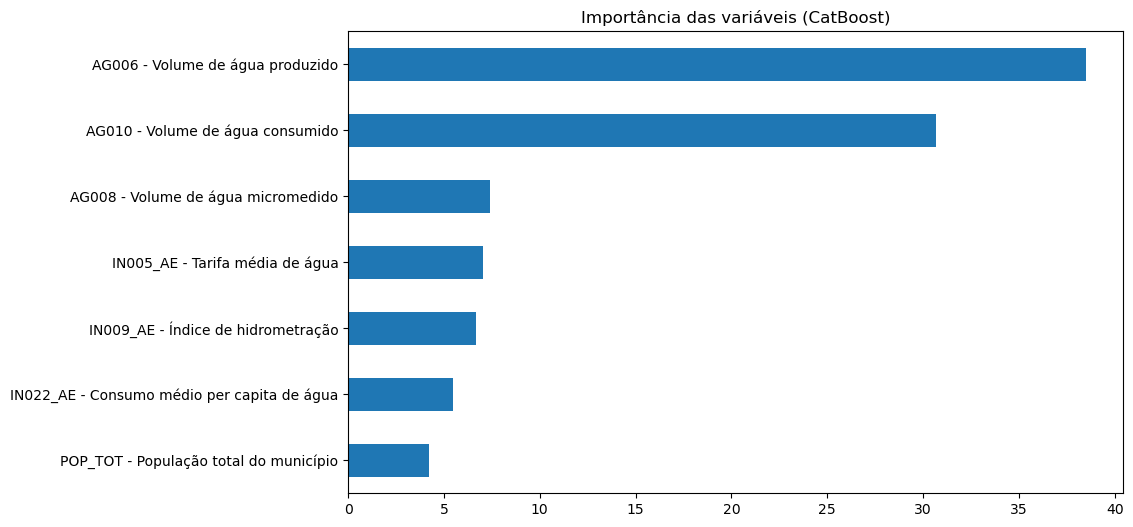

In [18]:
import matplotlib.pyplot as plt

# Importâncias
importances = model_catboost.feature_importances_
features = X_train.columns

# Plot manual
pd.Series(importances, index=features).sort_values().plot(kind='barh', figsize=(10,6))
plt.title("Importância das variáveis (CatBoost)")
plt.show()

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score

# Predição
y_pred = model_catboost.predict(X_test)
r2 = r2_score(y_test, y_pred)

# Gráfico
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.5, edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal')
plt.xlabel("Valor real")
plt.ylabel("Valor predito")
plt.title("Erro de predição - CatBoost")
plt.legend()
plt.grid(True)

# R² no canto superior esquerdo
plt.text(
    0.03, 0.92,
    f"R² = {r2:.2f}",
    transform=plt.gca().transAxes,
    fontsize=12,
    verticalalignment='top',
    bbox=dict(boxstyle="round", facecolor="white", edgecolor="gray", alpha=0.8)
)

plt.tight_layout()
plt.show()


NameError: name 'model_catboost' is not defined